<a href="https://colab.research.google.com/github/DANCAR1969/programacion/blob/master/tipo_de_envio_por_zona_de_riesgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desarrollar un sistema que, a partir de información geográfica, socioeconómica y de comportamiento histórico, clasifique cada zona de envío en:

Riesgo Bajo (0) → ✔ Permite pago contra entrega

Riesgo Alto (1) → ⚠ Requiere pago anticipado

📊 Classification Report:

              precision    recall  f1-score   support

 Riesgo Bajo       1.00      1.00      1.00         6
 Riesgo Alto       1.00      1.00      1.00        54

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



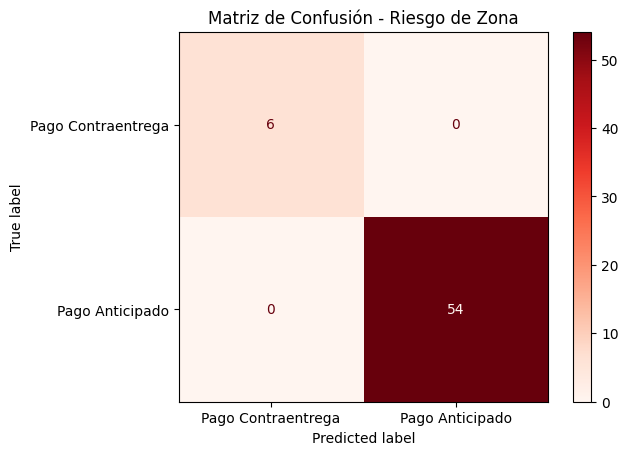

<ipython-input-1-c8bec511482a>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias, y=X.columns, palette="coolwarm")
<ipython-input-1-c8bec511482a>:50: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


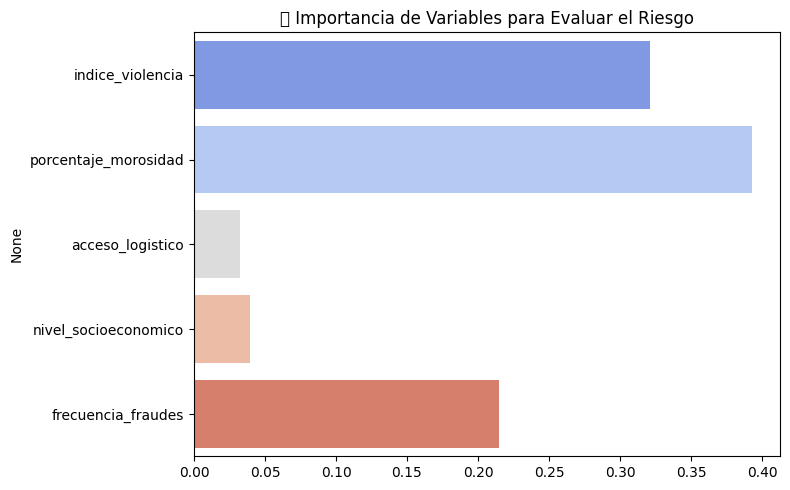


🧾 Resultado para nueva zona:
✅ Se permite pago contra entrega.


In [ ]:
# Paso 1: Librerías
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 2: Crear dataset simulado
np.random.seed(42)
data = pd.DataFrame({
    'indice_violencia': np.random.randint(0, 100, 200),
    'porcentaje_morosidad': np.random.uniform(0, 1, 200),
    'acceso_logistico': np.random.choice([0, 1, 2], 200),
    'nivel_socioeconomico': np.random.choice([1, 2, 3, 4, 5, 6], 200),
    'frecuencia_fraudes': np.random.randint(0, 10, 200)
})

# Regla base para riesgo
data['riesgo'] = ((data['indice_violencia'] > 60) |
                  (data['porcentaje_morosidad'] > 0.5) |
                  (data['frecuencia_fraudes'] > 5)).astype(int)

# Paso 3: Entrenamiento del modelo
X = data.drop("riesgo", axis=1)
y = data["riesgo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

# Paso 4: Evaluación
y_pred = modelo.predict(X_test)
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Riesgo Bajo", "Riesgo Alto"]))

# Paso 5: Visualización de matriz de confusión
ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, display_labels=["Pago Contraentrega", "Pago Anticipado"], cmap='Reds')
plt.title("Matriz de Confusión - Riesgo de Zona")
plt.grid(False)
plt.show()

# Paso 6: Importancia de variables
importancias = modelo.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=importancias, y=X.columns, palette="coolwarm")
plt.title("🔍 Importancia de Variables para Evaluar el Riesgo")
plt.tight_layout()
plt.show()

# Paso 7: Ejemplo de predicción en nueva zona
nueva_zona = pd.DataFrame({
    'indice_violencia': [45],
    'porcentaje_morosidad': [0.3],
    'acceso_logistico': [2],
    'nivel_socioeconomico': [4],
    'frecuencia_fraudes': [1]
})

riesgo_predicho = modelo.predict(nueva_zona)[0]
print("\n🧾 Resultado para nueva zona:")
if riesgo_predicho == 0:
    print("✅ Se permite pago contra entrega.")
else:
    print("⚠ Pago anticipado requerido (zona de riesgo alto).")
